In [1]:
import sys, os
from os.path import join, dirname, abspath
import matplotlib.pyplot as plt
from matplotlib.pyplot import Figure, Axes
import numpy as np
import networkx as nx
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from directions import *
from string import ascii_uppercase
plt.rcParams.update({
    "text.usetex": False,
    "ytick.minor.visible":True,
    "xtick.minor.visible":True,
    'xtick.direction': "in",
    'ytick.direction': "in"
})
outdir = "out"
os.makedirs(outdir,exist_ok=True)
def out(fname): return join(outdir,fname)
def savefig(plot_name): 
    plt.savefig(out(plot_name),bbox_inches="tight",dpi=250)
    
import pandas as pd
from numpy.linalg import matrix_power, eig

def arr_to_latex(M):
    return '$$\n' + r'\begin{bmatrix}' + '\n' + (r'\\' + '\n').join('&'.join(str(x) for x in row) for row in M) + '\n' + r'\end{bmatrix}' + '\n' +'$$'

def vec_to_latex(x,round=3):
    return '$$\n' + r'\begin{bmatrix}' + '\n' + (r' \\ ').join(str(np.round(v,round)) for v in x) + '\n' + r'\end{bmatrix}' + '\n' +'$$'

In [2]:
from car import Car
from tiles import Road, Exit, Onramp
from world import World
from traffic_signals import Stoplight

In [3]:
road_tiles = []

on_N = Onramp(2,0,N)
road_tiles.append(on_N)
road_tiles.append(Road(2,1,N))
center = Road(2,2,(N+E)/2)
road_tiles.append(center)
road_tiles.append(Road(2,3,N))
road_tiles.append(Exit(2,4))

on_E = Onramp(0,2,E)
road_tiles.append(on_E)
road_tiles.append(Road(1,2,E))
road_tiles.append(Road(3,2,E))
road_tiles.append(Exit(4,2))

w = World(road_tiles,cars=[])

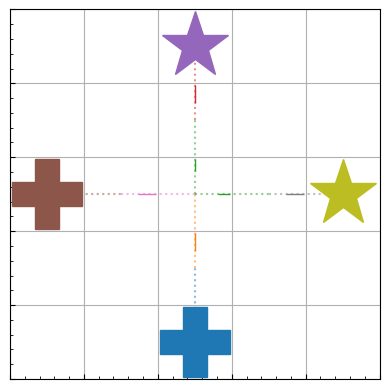

In [4]:
w.draw()

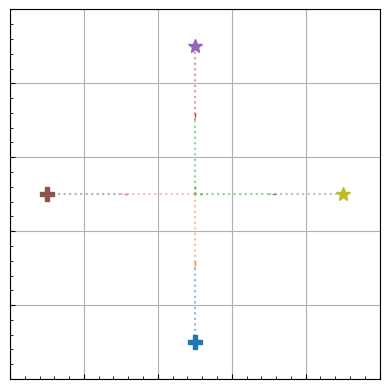

car <car.Car object at 0x0000014FC3AE4E60>: I'm going to Road(2,1,occupied=False)!
car <car.Car object at 0x0000014FC10F1E80>: I'm going to Road(1,2,occupied=False)!
car <car.Car object at 0x0000014FC10F1E80>: I'm going to Road(2,2,occupied=False)!
car <car.Car object at 0x0000014FC3B796A0>: I'm going to Road(1,2,occupied=False)!
car <car.Car object at 0x0000014FC3AE4E60>: I'm going to Road(2,1,occupied=True)!
car <car.Car object at 0x0000014FC191B410>: I'm going to Road(2,0,occupied=True)!
car <car.Car object at 0x0000014FC10F1E80>: I'm going to Road(2,3,occupied=False)!
car <car.Car object at 0x0000014FC3B796A0>: I'm going to Road(2,2,occupied=False)!
car <car.Car object at 0x0000014FC191B410>: I'm going to Road(2,0,occupied=True)!
car <car.Car object at 0x0000014FC1A0AC30>: I'm going to Road(1,2,occupied=False)!
car <car.Car object at 0x0000014FC3AE4E60>: I'm going to Road(2,1,occupied=True)!
car <car.Car object at 0x0000014FC3B796A0>: I'm going to Road(3,2,occupied=False)!
car <car

In [5]:
w.run(10,draw=True,outpath=out("intersection.gif"),markersize=10)

In [6]:
s = Stoplight(tile=center,direction=4)

In [7]:
print(s.affected_tile.carless_directions)
print(s.affected_tile.p_directions)
s.stop()
print(s.affected_tile.carless_directions)
print(s.affected_tile.p_directions)

[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
print(center.neighbors[4])

Road(2,1,occupied=True)


In [9]:
print(s.affected_tile)

Road(2,1,occupied=True)


In [10]:
print(s.affected_tile.carless_directions)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


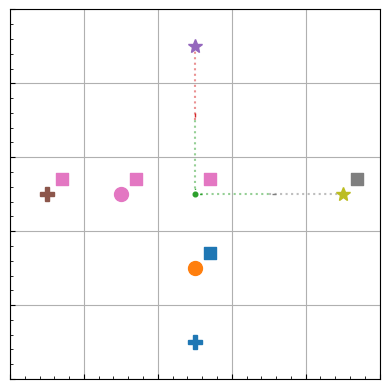

car <car.Car object at 0x0000014FC1A64080>: I'm going to Road(1,2,occupied=True)!
car <car.Car object at 0x0000014FC1A34200>: I'm going to Road(2,1,occupied=True)!
car <car.Car object at 0x0000014FC4D0B050>: I'm going to Road(2,0,occupied=True)!
car <car.Car object at 0x0000014FC4D8A3F0>: I'm going to Road(0,2,occupied=True)!
car <car.Car object at 0x0000014FC191B410>: I'm going to Road(2,2,occupied=True)!
car <car.Car object at 0x0000014FC1A64080>: I'm going to Road(1,2,occupied=True)!
car <car.Car object at 0x0000014FC4D0B050>: I'm going to Road(2,0,occupied=True)!
car <car.Car object at 0x0000014FC4D8A3F0>: I'm going to Road(0,2,occupied=True)!
car <car.Car object at 0x0000014FC1A34200>: I'm going to Road(2,1,occupied=True)!
car <car.Car object at 0x0000014FC191B410>: I'm going to Road(2,2,occupied=True)!
car <car.Car object at 0x0000014FC1A64080>: I'm going to Road(1,2,occupied=True)!
car <car.Car object at 0x0000014FC1A34200>: I'm going to Road(2,1,occupied=True)!
car <car.Car obj

In [11]:
w.run(10,draw=True,outpath=out("intersection.gif"),markersize=10)